**Linear Regression with Python**<br>**PIT in ES209 Engineering Data Analysis**<br>Timajo, Kurt Vincent O. <br>CpE-1C

**Predicting Canada's Per Capita Income in the year 2025**<br>using Linear Regression in Python

In [234]:
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import numpy as np

**Canada Per Capita Income (US$) per year**

In [235]:
df = pd.read_csv('canada-capita-income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


**Scatter plot of Canada per capita income**

<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

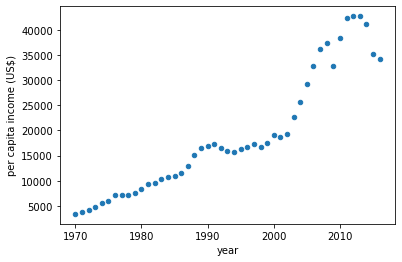

In [236]:
df.plot(x="year",y="per capita income (US$)", kind="scatter")

In [237]:
dep_var = df["per capita income (US$)"] #dependent variable
exp_var = df["year"] #explanatory/independent variable

In [238]:
exp_var = sm.add_constant(exp_var)

**Correlation Coefficient**

In [239]:
x_simple = np.array(df["year"])
y_simple = np.array(df["per capita income (US$)"])
rho = np.corrcoef(x_simple, y_simple)
print(f"Correlation Coefficient: \n{rho}")

Correlation Coefficient: 
[[1.         0.94388395]
 [0.94388395 1.        ]]


r = **0.94**<br>Strength: **Strong Positive Correlation**

*Fitting the linear regression model*

In [240]:
model = sm.OLS(dep_var,exp_var)
result = model.fit()  

**The Regression Summary**

In [241]:
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     per capita income (US$)   R-squared:                       0.891
Model:                                 OLS   Adj. R-squared:                  0.888
Method:                      Least Squares   F-statistic:                     367.5
Date:                     Thu, 09 Jun 2022   Prob (F-statistic):           2.80e-23
Time:                             14:01:20   Log-Likelihood:                -455.71
No. Observations:                       47   AIC:                             915.4
Df Residuals:                           45   BIC:                             919.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Interpretation of the Regression Results**<br>
#write here the interpretation of the regression results

**Predicting the per capita income of Canada in the year 2025**

In [242]:
_year_to_predict = 2025
predic = result.predict([1,_year_to_predict])
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${predic}")

Predicted Canada's per capita income (year 2025): $[45431.01947053]


**Line of best fit (regression line)**

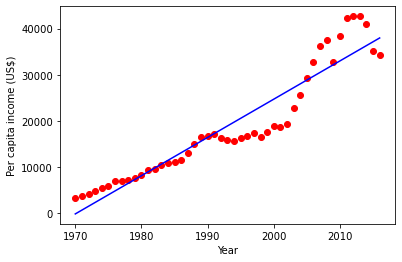

In [243]:
pred_plot = plt.figure()
plt.xlabel("Year")
plt.ylabel("Per capita income (US$)")
pred_plot = plt.plot(df["year"],df["per capita income (US$)"],'ro',label="data")
pred_plot = plt.plot(df["year"],result.fittedvalues,'b-',label="regression line")

**Determining the coefficients using sklearn's linear_model**

In [244]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [245]:
_year = df.drop('per capita income (US$)',axis='columns')

In [246]:
_pci = df['per capita income (US$)']

In [247]:
LR = linear_model.LinearRegression()
LR.fit(_year,_pci)

LinearRegression()

Linear Equation **Y = mX + b** <br>where m = slope ;  X = year variable ; b = intercept

*Determining the **slope m***

In [248]:
print(f"Slope m = {LR.coef_}")

Slope m = [828.46507522]


*Determining the **intercept b***

In [249]:
print(f"Intercept b = {LR.intercept_}")

Intercept b = -1632210.7578554575


*Line of best fit:* <br>**Y = 828.46507522(X) - 1632210.7578554575**

*Predicting using the prediction function*

In [250]:
predic = LR.predict([[_year_to_predict]])
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${predic}")

Predicted Canada's per capita income (year 2025): $[45431.01947053]


c:\Users\djkur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*Using the **line of best fit** to predict the per capita income for year x=2020*

In [251]:
y = (828.46507522*_year_to_predict) - 1632210.7578554575
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${y}")

Predicted Canada's per capita income (year 2025): $45431.01946504251
